# Homework 10

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal as ss

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    #print(intege(result.size/2)
    return result[int(result.size/2):]

def Circle(size, loc,rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

import scipy.fftpack as ft

def Correlate2D(A, B):
    a = ft.fft2(A)
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

def FPF(data, c, fp):
    # data is the incoming data... in rows : It is converted to columns here c is the constraint vector
    (N,Dim )= data.shape
    #X = transpose( data )# put vectors into columns

    # Compute D.  Best done in rows
    D = ( np.power( abs( data), fp )).sum(0)
    D = D / N
    
    # it is possible that some values of D are 0 which will bomb out later
    ndx = (abs(D) < 0.001).nonzero()[0]
    D[ndx] = 0.001 * np.sign(D[ndx]+1e9)

    # Y is the modified X.  Also more efficient to compute from original data
    Y = data / np.sqrt(D)
    Y = Y.transpose()
    
    # compute Q
    Yc = Y.conjugate().transpose()
    Q = Yc.dot(Y)  # inner product
    
    if N == 1:  # only 1 training vector
        Q = 1./Q
    else:
        Q = np.linalg.inv(Q)
    
    Rc = Q.dot(c)
    H = Y.dot(Rc) / np.sqrt(D)
    # to test:  sum(conjugate(H[:,0]) * data[:,any] should equal c[any]
    return H

<br><br><br><br><br><br><br><br>

1.  Create a vector, $\vec v$, which has 48 consecutive 0's, 32 consecutive 1's, and 48 consecutive 0's. Compute the autocorrelation of $\vec v$.  Describe the meaning of the results.

In [2]:
l = []
for i in range(48):
    l.append(0)
for i in range(32):
    l.append(1)
for i in range(48):
    l.append(0)
    
v = np.array(l)
autocorr(v)

array([32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0])

<span style="color:blue"> The autocorrelation is a way to figure out how similar a signal, or function, is to itself at a certain time. It is used to figure this out. In theory, when there is no difference in time, the autocorrelation should be at its highest. This is because the signal is identical to itself, so you thought the first element in the autocorrelation result array would be highest. There is, however, a time difference of 0. When it starts, there is a big difference in time. It closes to zero, and then there is a big difference again.

<br><br><br><br><br><br><br><br>

2.  Create two images both with a frame size of $256 \times 256$. In center of the first image, ${\bf a}[\vec x]$, create a solid circle of radius 64. In the center of the second image, ${\bf b}[\vec x]$, create a solid circle of radius 70. (Use Circle to generate these images.) Compute the correlation of ${\bf a}[\vec x]$ and ${\bf b}[\vec x]$.

a[x]


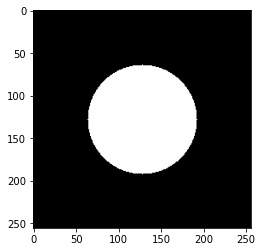

b[x]


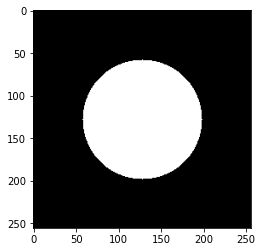

correlation of a[x] and b[x]


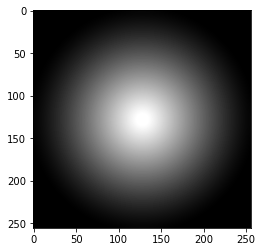

In [3]:
adata = Circle((256,256), (128,128), 64)
bdata = Circle((256,256), (128,128), 70)

print("a[x]")
plt.imshow(adata, cmap = "gray")
plt.show()
print("b[x]")
plt.imshow(bdata, cmap = "gray")
plt.show()

cdata = Correlate2D(adata, bdata)
print("correlation of a[x] and b[x]")
plt.imshow(cdata.real, cmap = "gray")
plt.show()

<br><br><br><br><br><br><br><br>

3.  Create an image with a frame size of $256 \times 256$. In center of the image, ${\bf a}[\vec x]$, create a solid circle of radius 64. Using the Fractional Power Filter code, calculate and display the circle image with an alpha equal 0.2.  Repeat with an alpha equal 0.7.  Repeat using the absolute value of the resulting image.  Discuss your results.

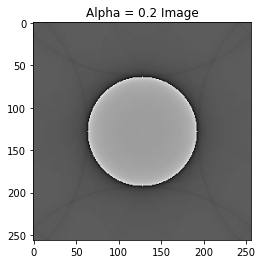

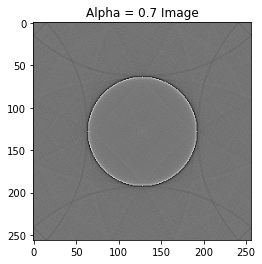

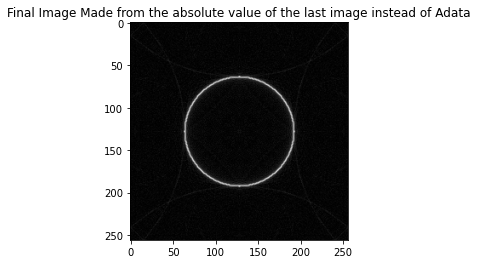

In [4]:
adata = Circle((256,256), (128,128), 64)
V,H =  adata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(adata).ravel()
cst = np.ones(1)

alpha = .2
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.2 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()

Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(adata).ravel()
cst = np.ones(1)

alpha = .7
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.7 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()

Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(abs(filt)).ravel()
cst = np.ones(1)

alpha = .7
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Final Image Made from the absolute value of the last image instead of Adata')
plt.imshow(filt.real, cmap='gray')
plt.show()

<span style="color:blue"> This Fractional Power filter code looks like a very powerful tool, especially since it took verry little time to run. The images in this example clearly are exposed, and in the last image the new edges seem to dissapear almost altogether. Unfortunately, I can imagine that the new edges introduced by the transform would get in the way a little bit. Here's some of my code from playing around a little:

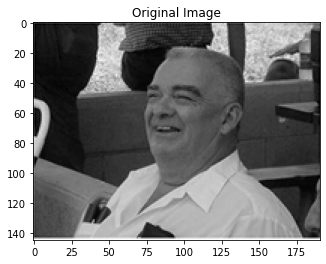

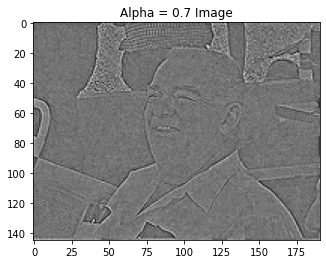

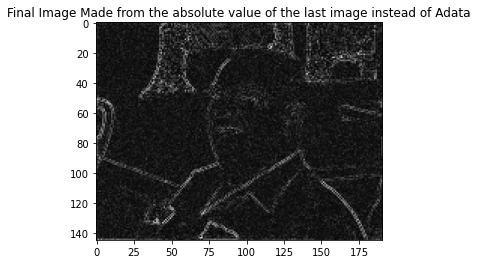

In [5]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/L12_4.png'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

V,H =  adata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(adata).ravel()
cst = np.ones(1)

alpha = .9
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.7 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()

Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(abs(filt)).ravel()
cst = np.ones(1)

alpha = .1
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Final Image Made from the absolute value of the last image instead of Adata')
plt.imshow(filt.real, cmap='gray')
plt.show()